## Decision Tree Classifier

In [1]:
#import bibliotecas

import numpy as np
import pandas as pd

from sklearn import tree    as tr
from sklearn import metrics as mt

from matplotlib import pyplot as plt

### Load Datasets

In [2]:
X_train = pd.read_csv('X_training.csv')
y_train = pd.read_csv('y_training.csv') 
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_val = pd.read_csv('X_validation.csv')
y_val = pd.read_csv('y_validation.csv') 

**Remover a coluna do ID dos datasets pois não é uma coluna categórica**

In [3]:
X_train = X_train.drop(['id'] , axis =1)
X_test = X_test.drop(['id'] , axis =1)
X_val = X_val.drop(['id'] , axis =1)

In [4]:
X_train.head(2)

,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,1,0.50000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,1.0,...,0.5,1.0,0.6,0.4,0.0,0.013848,1.0,0.0,1.0,0.0
1,1,0.24359,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,0.8,...,0.5,0.5,0.2,0.6,0.0,0.000000,0.0,1.0,1.0,0.0


### Dados de Treino

In [5]:

values = [i for i in range(1,60)]
acc_scores = []
precision_scores = []
recall_scores = []
f1score_scores = []

#define

for i in values:
    model = tr.DecisionTreeClassifier(max_depth = i)

# training (fit)
    model.fit(X_train , y_train)
    
# predict sobre os dados de treinamento 
    yhat_train = model.predict( X_train)

#Acurácia
    acc = mt.accuracy_score( y_train, yhat_train )
    acc_scores.append(acc)

#Precision
    precision = mt.precision_score( y_train, yhat_train )
    precision_scores.append(precision)
    
#Recall
    recall = mt.recall_score( y_train, yhat_train )
    recall_scores.append(recall)
    
#F1-Score
    f1score = mt.f1_score( y_train, yhat_train )
    f1score_scores.append(f1score)
    
    
    

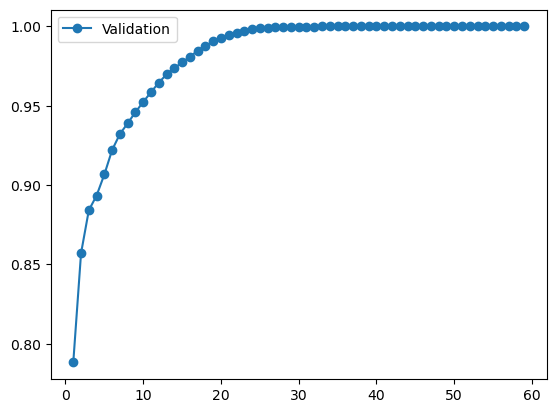

In [6]:

plt.plot( values, acc_scores, '-o', label='Validation' )
plt.legend()
plt.show()

**melhor max_depth encontrado é:**

In [7]:
best_md = acc_scores.index(max(acc_scores))
best_md 

33

**Dataframe dos valores de treino**

In [8]:
df_valores = { 'Max_depth' : values,
               'Acurácia'  : acc_scores,
               'Precision' : precision_scores,
               'Recall'    : recall_scores,
               'F1 Score'  : f1score_scores
             }

df_valores = pd.DataFrame(df_valores)


**Valores de Acurácia, Precision, Recall e F1 Score para dados de treino:**

In [9]:
filtro = df_valores['Max_depth'] = best_md

df_valores.loc[filtro , :]

Max_depth    33.0
Acurácia      1.0
Precision     1.0
Recall        1.0
F1 Score      1.0
Name: 33, dtype: float64

### Dados de Validação

**Agora com o melhor parametro de max_depth sobre os dados de validação**

In [10]:
# Definition
model = tr.DecisionTreeClassifier(max_depth = best_md)

#Traning 
model.fit(X_train , y_train)

#Previsão sobre os dados de validacao
yhat_val = model.predict( X_val)

# metrica acuracia val
accuracy = mt.accuracy_score( y_val, yhat_val )
print(f'Accuracy: {accuracy} ')

#precision val
precision = mt.precision_score( y_val, yhat_val)
print (f'Precision:{precision} ')

#recall val
recall = mt.recall_score( y_val, yhat_val)
print (f'Recall:{recall} ')

#F1-Score val
f1_score = mt.f1_score( y_val, yhat_val)
print(f'F1-Score:{f1_score} \n')


Accuracy: 0.9437240580456256 
Precision:0.9311359623307828 
Recall:0.9396391714306928 
F1-Score:0.9353682421196556 



### Dados de Teste

**Modelo treinado e validado. Agora com o melhor parametro de max_depth sobre os dados de teste**

In [11]:
# Definition
model_last = tr.DecisionTreeClassifier(max_depth = best_md)

#Training
model_last.fit(np.concatenate((X_train, X_val)), 
               np.concatenate((y_train, y_val)))

#previsão sobre os dados de teste e validacao juntos
ypred_test = model_last.predict(X_test)

# metrica acuracia teste
accuracy = mt.accuracy_score( y_test, ypred_test )
print(f'Accuracy: {accuracy} ')

#precision teste
precision = mt.precision_score( y_test, ypred_test)
print (f'Precision:{precision} ')

#recall teste
recall = mt.recall_score( y_test, ypred_test)
print (f'Recall:{recall} ')

#F1-Score teste
f1_score = mt.f1_score( y_test, ypred_test)
print(f'F1-Score:{f1_score} \n')


Accuracy: 0.9467809832773336 
Precision:0.9376807783328951 
Recall:0.941311042674879 
F1-Score:0.9394924036181611 



\\?\C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
